In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv


In [2]:
Data= pd.read_csv('../input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv')
Data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
Data.shape

(62642, 29)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

# Missing Values

In [5]:
missing= Data.isna().sum()
percentage=round((missing/len(Data.index))*100,2)
print(percentage)

timestamp                   0.00
company                     0.01
level                       0.19
title                       0.00
totalyearlycompensation     0.00
location                    0.00
yearsofexperience           0.00
yearsatcompany              0.00
tag                         1.36
basesalary                  0.00
stockgrantvalue             0.00
bonus                       0.00
gender                     31.19
otherdetails               35.93
cityid                      0.00
dmaid                       0.00
rowNumber                   0.00
Masters_Degree              0.00
Bachelors_Degree            0.00
Doctorate_Degree            0.00
Highschool                  0.00
Some_College                0.00
Race_Asian                  0.00
Race_White                  0.00
Race_Two_Or_More            0.00
Race_Black                  0.00
Race_Hispanic               0.00
Race                       64.20
Education                  51.52
dtype: float64


In [6]:
Data= Data.drop(['gender','otherdetails','Race','Education'], axis=1)
Data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
round((Data.isna().sum()/len(Data.index))*100,2)

timestamp                  0.00
company                    0.01
level                      0.19
title                      0.00
totalyearlycompensation    0.00
location                   0.00
yearsofexperience          0.00
yearsatcompany             0.00
tag                        1.36
basesalary                 0.00
stockgrantvalue            0.00
bonus                      0.00
cityid                     0.00
dmaid                      0.00
rowNumber                  0.00
Masters_Degree             0.00
Bachelors_Degree           0.00
Doctorate_Degree           0.00
Highschool                 0.00
Some_College               0.00
Race_Asian                 0.00
Race_White                 0.00
Race_Two_Or_More           0.00
Race_Black                 0.00
Race_Hispanic              0.00
dtype: float64

In [8]:
mean = Data['dmaid'].mean()
Data = Data.fillna({'company' : 'Amazon' , 'level' : 'L4' , 'tag' : 'Full Stack' , 'dmaid' : mean})
Data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,Full Stack,107000.0,...,0,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,Full Stack,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,Full Stack,155000.0,...,0,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Full Stack,0.0,...,0,0,0,0,0,0,0,0,0,0


# Duplication

In [9]:
Data.duplicated().sum()

0

# Outliers

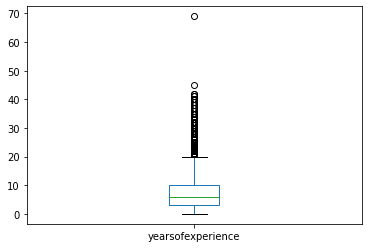

In [10]:
def boxPlot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
boxPlot(Data,'yearsofexperience')

In [11]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    lst = df.index[(df[ft] < lowerBound)|(df[ft] > upperBound)]
    return lst

In [12]:
outlierList=[]
for ft in ['yearsofexperience']:
    outlierList.extend(outliers(Data,ft))
print(len(outlierList))
Data.shape

1439


(62642, 25)

In [13]:
Data = Data.drop(outlierList)
Data.shape

(61203, 25)

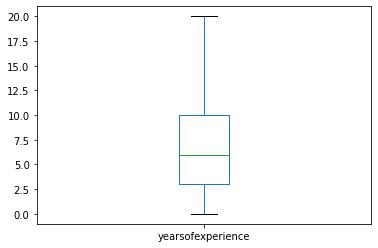

In [14]:
boxPlot(Data,'yearsofexperience')